In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
import statannot

# Compare DeepCellState variations

In [2]:
import seaborn as sns
sns.set()

In [44]:
res_dcs_noise = pd.read_csv('../results/deepcellstate_results_10kgenes/deepcellstate_allgenes_10foldvalidation_results1000ep_with_noise_10k.csv',index_col=0)
res_dcs_noise['model'] = 'DCS'
res_dcs_nonoise = pd.read_csv('../results/deepcellstate_results_10kgenes/deepcellstate_allgenes_10foldvalidation_results1000ep_no_noise_10k.csv',index_col=0)
res_dcs_nonoise['model'] = 'DCS modified v1'
res_dcs_direct = pd.read_csv('../results/deepcellstate_results_10kgenes/deepcellstate_allgenes_10foldvalidation_results1000ep_direct_andl2similarity_10k.csv',index_col=0)
res_dcs_direct['model'] = 'DCS modified v2'
res_dcs_onlyL2 = pd.read_csv('../results/deepcellstate_results_10kgenes/deepcellstate_allgenes_10foldvalidation_results1000ep_l2similarity_10k.csv',index_col=0)
res_dcs_onlyL2['model'] = 'DCS modified v3'
baseline = pd.read_csv('../results/baseline_evaluation_allgenes.csv',index_col=0)
baseline = baseline.drop_duplicates()

In [4]:
results = pd.concat([res_dcs_noise,
                     res_dcs_nonoise,
                     res_dcs_direct,
                     res_dcs_onlyL2],axis=0)
results

,model_pearsonHT29,model_pearsonA375,model_spearHT29,model_spearA375,model_accHT29,model_accA375,recon_pear_ht29,recon_pear_a375,recon_spear_ht29,recon_spear_a375,recon_acc_ht29,recon_acc_a375,cross_corr_ht29,cross_corr_a375,Direct_pearson,Direct_spearman,DirectAcc_ht29,DirectAcc_a375,model
0,0.613718,0.599170,0.526330,0.512294,0.685056,0.680166,0.947445,0.944607,0.937704,0.931870,0.896936,0.891681,0.920867,0.920973,0.491287,0.213417,0.642906,0.642906,DCS
1,0.566115,0.558736,0.464582,0.463245,0.663853,0.665333,0.945406,0.942046,0.934308,0.929751,0.894100,0.889458,0.915497,0.915471,0.449773,0.484918,0.631011,0.631011,DCS
2,0.609149,0.582151,0.492402,0.473071,0.667321,0.661947,0.942116,0.947642,0.933452,0.935973,0.893411,0.894833,0.911275,0.915116,0.467521,0.225109,0.626187,0.626187,DCS
3,0.530387,0.514541,0.418556,0.411831,0.646344,0.644403,0.944477,0.941711,0.933683,0.929063,0.894614,0.889775,0.913457,0.919640,0.420189,0.132573,0.617286,0.617286,DCS
4,0.649465,0.635018,0.522971,0.505391,0.686253,0.680406,0.950940,0.945411,0.942423,0.933031,0.903572,0.894141,0.923569,0.925903,0.534992,0.588160,0.646800,0.646800,DCS
5,0.517710,0.500510,0.456342,0.436321,0.659744,0.653069,0.952127,0.946220,0.942698,0.937022,0.903724,0.896427,0.915390,0.922801,0.414236,0.500197,0.626274,0.626274,DCS
6,0.379070,0.377209,0.345177,0.332456,0.616173,0.611459,0.947209,0.943144,0.939710,0.932478,0.900714,0.891758,0.918249,0.919547,0.305874,0.156733,0.590469,0.590469,DCS
7,0.565623,0.548966,0.465607,0.445844,0.665412,0.657116,0.951822,0.941229,0.944159,0.933005,0.905886,0.893113,0.916835,0.922630,0.453185,0.515452,0.629866,0.629866,DCS
8,0.390222,0.374094,0.324936,0.311553,0.606323,0.601103,0.946720,0.943884,0.939709,0.935252,0.901069,0.895268,0.913029,0.914657,0.301552,0.143882,0.581630,0.581630,DCS
9,0.470474,0.465445,0.379353,0.370936,0.630049,0.627560,0.944046,0.940707,0.935589,0.932645,0.895927,0.893243,0.918858,0.917644,0.381603,0.261180,0.603909,0.603909,DCS


## A375 trasnlation

In [5]:
res_to_a375 = results.loc[:,['model_pearsonA375','model_spearA375','model_accA375','model']]
res_to_a375.columns = ['pearson','spearman','sign accuracy','model']
res_baseline = baseline.loc[:,['Direct_pearson','Direct_spearman','DirectAcc_a375']]
res_baseline['model'] = 'direct translation'
res_baseline.columns = ['pearson','spearman','sign accuracy','model']
res_to_a375 = pd.concat([res_to_a375,res_baseline],axis=0)
res_to_a375

,pearson,spearman,sign accuracy,model
0,0.599170,0.512294,0.680166,DCS
1,0.558736,0.463245,0.665333,DCS
2,0.582151,0.473071,0.661947,DCS
3,0.514541,0.411831,0.644403,DCS
4,0.635018,0.505391,0.680406,DCS
5,0.500510,0.436321,0.653069,DCS
6,0.377209,0.332456,0.611459,DCS
7,0.548966,0.445844,0.657116,DCS
8,0.374094,0.311553,0.601103,DCS
9,0.465445,0.370936,0.627560,DCS


In [6]:
res_to_a375 = pd.melt(res_to_a375,id_vars=['model'])
res_to_a375.columns = ['model','metric','value']
res_to_a375

,model,metric,value
0,DCS,pearson,0.599170
1,DCS,pearson,0.558736
2,DCS,pearson,0.582151
3,DCS,pearson,0.514541
4,DCS,pearson,0.635018
...,...,...,...
145,direct translation,sign accuracy,0.626368
146,direct translation,sign accuracy,0.590569
147,direct translation,sign accuracy,0.629967
148,direct translation,sign accuracy,0.581735


In [7]:
res_to_a375.model.unique()

array(['DCS', 'DCS modified v1', 'DCS modified v2', 'DCS modified v3',
       'direct translation'], dtype=object)

[Text(0.5, 1.0, ''),
 Text(0.5, 0, 'Performance metric value'),
 Text(0, 0.5, 'models')]

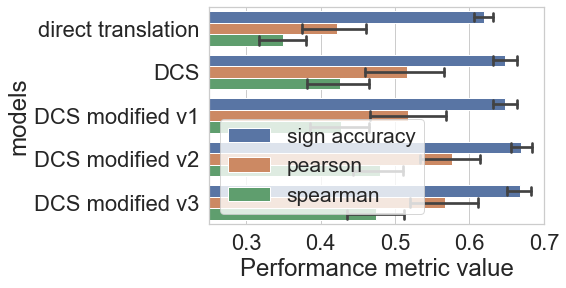

In [9]:
sns.set_theme(style="whitegrid",font_scale=2)
# plt.figure(figsize=(8,7), dpi= 300)
plt.figure()
ax = sns.barplot(x="value", y="model", data=res_to_a375,
            order=['direct translation',
                   'DCS',
                   'DCS modified v1',
                   'DCS modified v2',
                   'DCS modified v3'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.xlim(0.25,0.7)
plt.legend(loc='lower left',prop={'size': 21})
plt.gca().set(title='', 
              xlabel = 'Performance metric value',
              ylabel='models')

In [10]:
from scipy import stats

In [11]:
models = ['direct translation',
                   'DCS',
                   'DCS modified v1',
                   'DCS modified v2',
                   'DCS modified v3']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='pearson'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-11-a66691395e8f>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='pearson'].value.values
<ipython-input-11-a66691395e8f>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='pearson'].value.values


In [12]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='spearman'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-12-2bb75a293747>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='spearman'].value.values
<ipython-input-12-2bb75a293747>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='spearman'].value.values


In [13]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='sign accuracy'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='sign accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'sign accuracy'

<ipython-input-13-a9ff6e3ced82>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='sign accuracy'].value.values
<ipython-input-13-a9ff6e3ced82>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='sign accuracy'].value.values


In [15]:
a375_translate = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
a375_translate = a375_translate[['metric','direct translation',
                   'DCS',
                   'DCS modified v1',
                   'DCS modified v2',
                   'DCS modified v3']]
a375_translate.to_csv('../results/deepcellstate_results_10kgenes/a375_all_autoencoders_comparison_allgenes_translation_pvalues_table.csv')
a375_translate

,metric,direct translation,DCS,DCS modified v1,DCS modified v2,DCS modified v3
direct translation,pearson,1.0,0.031209,0.031209,0.001315,0.002827
DCS,pearson,0.0,1.000000,0.850107,0.075662,0.140465
DCS modified v1,pearson,0.0,0.000000,1.000000,0.104110,0.140465
DCS modified v2,pearson,0.0,0.000000,0.000000,1.000000,0.733730
DCS modified v3,pearson,0.0,0.000000,0.000000,0.000000,1.000000
direct translation,spearman,1.0,0.025748,0.025748,0.001008,0.002202
DCS,spearman,0.0,1.000000,1.000000,0.088973,0.140465
DCS modified v1,spearman,0.0,0.000000,1.000000,0.104110,0.121225
DCS modified v2,spearman,0.0,0.000000,0.000000,1.000000,0.791337
DCS modified v3,spearman,0.0,0.000000,0.000000,0.000000,1.000000


### Same but for reconstruction

In [16]:
res_recon_a375 = results.loc[:,['recon_pear_a375','recon_spear_a375','recon_acc_a375','model']]
res_recon_a375.columns = ['pearson','spearman','sign accuracy','model']
res_recon_a375

,pearson,spearman,sign accuracy,model
0,0.944607,0.931870,0.891681,DCS
1,0.942046,0.929751,0.889458,DCS
2,0.947642,0.935973,0.894833,DCS
3,0.941711,0.929063,0.889775,DCS
4,0.945411,0.933031,0.894141,DCS
5,0.946220,0.937022,0.896427,DCS
6,0.943144,0.932478,0.891758,DCS
7,0.941229,0.933005,0.893113,DCS
8,0.943884,0.935252,0.895268,DCS
9,0.940707,0.932645,0.893243,DCS


In [17]:
res_recon_a375 = pd.melt(res_recon_a375,id_vars=['model'])
res_recon_a375.columns = ['model','metric','value']
res_recon_a375

,model,metric,value
0,DCS,pearson,0.944607
1,DCS,pearson,0.942046
2,DCS,pearson,0.947642
3,DCS,pearson,0.941711
4,DCS,pearson,0.945411
...,...,...,...
115,DCS modified v3,sign accuracy,0.786484
116,DCS modified v3,sign accuracy,0.779772
117,DCS modified v3,sign accuracy,0.776659
118,DCS modified v3,sign accuracy,0.782283


[Text(0.5, 1.0, ''),
 Text(0.5, 0, 'Performance metric value'),
 Text(0, 0.5, 'models')]

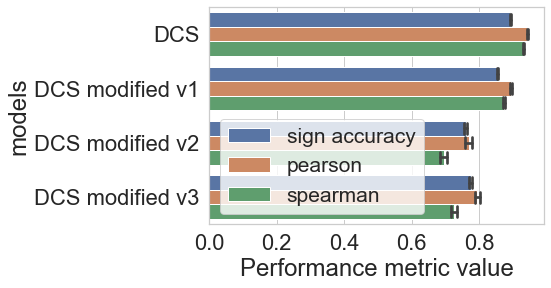

In [18]:
sns.set_theme(style="whitegrid",font_scale=2)
# plt.figure(figsize=(9,12), dpi= 80)
plt.figure()
ax = sns.barplot(x="value", y="model", data=res_recon_a375,
            order=['DCS',
                   'DCS modified v1',
                   'DCS modified v2',
                   'DCS modified v3'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left',prop={'size': 21})
plt.gca().set(title='', 
              xlabel = 'Performance metric value',
              ylabel='models')
#plt.xticks(rotation=45)

In [19]:
models = ['DCS',
                   'DCS modified v1',
                   'DCS modified v2',
                   'DCS modified v3']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='pearson'].value.values
        x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-19-8130dbe11b26>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='pearson'].value.values
<ipython-input-19-8130dbe11b26>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='pearson'].value.values


In [20]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='spearman'].value.values
        x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-20-db2d8645d6f5>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='spearman'].value.values
<ipython-input-20-db2d8645d6f5>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='spearman'].value.values


In [21]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='sign accuracy'].value.values
        x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='sign accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'sign accuracy'

<ipython-input-21-26171e6f1a72>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='sign accuracy'].value.values
<ipython-input-21-26171e6f1a72>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='sign accuracy'].value.values


In [24]:
a375_reconstruction = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
a375_reconstruction = a375_reconstruction[['metric','DCS',
                   'DCS modified v1',
                   'DCS modified v2',
                   'DCS modified v3']]
a375_reconstruction.to_csv('../results/deepcellstate_results_10kgenes/a375_all_autoencoders_comparison_allgenes_reconstruction_pvalues_table.csv')
a375_reconstruction

,metric,DCS,DCS modified v1,DCS modified v2,DCS modified v3
DCS,pearson,1.0,0.000183,0.000183,0.000183
DCS modified v1,pearson,0.0,1.000000,0.000183,0.000183
DCS modified v2,pearson,0.0,0.000000,1.000000,0.002202
DCS modified v3,pearson,0.0,0.000000,0.000000,1.000000
DCS,spearman,1.0,0.000183,0.000183,0.000183
DCS modified v1,spearman,0.0,1.000000,0.000183,0.000183
DCS modified v2,spearman,0.0,0.000000,1.000000,0.001315
DCS modified v3,spearman,0.0,0.000000,0.000000,1.000000
DCS,sign accuracy,1.0,0.000183,0.000183,0.000183
DCS modified v1,sign accuracy,0.0,1.000000,0.000183,0.000183


## HT29 trasnlation

In [25]:
res_to_ht29 = results.loc[:,['model_pearsonHT29','model_spearHT29','model_accHT29','model']]
res_to_ht29.columns = ['pearson','spearman','sign accuracy','model']
res_baseline = baseline.loc[:,['Direct_pearson','Direct_spearman','DirectAcc_ht29']]
res_baseline['model'] = 'direct translation'
res_baseline.columns = ['pearson','spearman','sign accuracy','model']
res_to_ht29 = pd.concat([res_to_ht29,res_baseline],axis=0)
res_to_ht29

,pearson,spearman,sign accuracy,model
0,0.613718,0.526330,0.685056,DCS
1,0.566115,0.464582,0.663853,DCS
2,0.609149,0.492402,0.667321,DCS
3,0.530387,0.418556,0.646344,DCS
4,0.649465,0.522971,0.686253,DCS
5,0.517710,0.456342,0.659744,DCS
6,0.379070,0.345177,0.616173,DCS
7,0.565623,0.465607,0.665412,DCS
8,0.390222,0.324936,0.606323,DCS
9,0.470474,0.379353,0.630049,DCS


In [26]:
res_to_ht29 = pd.melt(res_to_ht29,id_vars=['model'])
res_to_ht29.columns = ['model','metric','value']
res_to_ht29

,model,metric,value
0,DCS,pearson,0.613718
1,DCS,pearson,0.566115
2,DCS,pearson,0.609149
3,DCS,pearson,0.530387
4,DCS,pearson,0.649465
...,...,...,...
145,direct translation,sign accuracy,0.626368
146,direct translation,sign accuracy,0.590569
147,direct translation,sign accuracy,0.629967
148,direct translation,sign accuracy,0.581735


(0.25, 0.7)

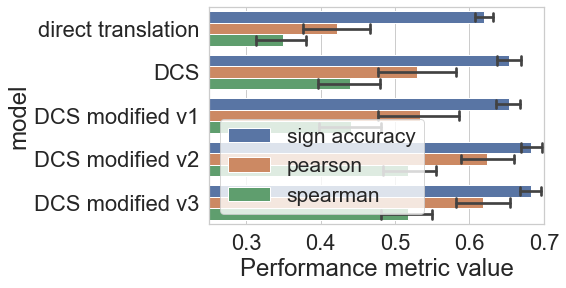

In [28]:
sns.set_theme(style="whitegrid",font_scale=2)
# plt.figure(figsize=(9,12), dpi= 80)
plt.figure()
ax = sns.barplot(x="value", y="model", data=res_to_ht29,
            order=['direct translation',
                   'DCS',
                   'DCS modified v1',
                   'DCS modified v2',
                   'DCS modified v3'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left',prop={'size': 21})
plt.gca().set(title='', 
              xlabel = 'Performance metric value',
              ylabel='model')
plt.xlim(0.25,0.7)

In [29]:
models = ['direct translation',
                   'DCS',
                   'DCS modified v1',
                   'DCS modified v2',
                   'DCS modified v3']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='pearson'].value.values
        x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-29-562ffc086038>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='pearson'].value.values
<ipython-input-29-562ffc086038>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='pearson'].value.values


In [30]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='spearman'].value.values
        x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-30-2b2bd44095e3>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='spearman'].value.values
<ipython-input-30-2b2bd44095e3>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='spearman'].value.values


In [31]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='sign accuracy'].value.values
        x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='sign accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'sign accuracy'

<ipython-input-31-cfb7e48ca1ad>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='sign accuracy'].value.values
<ipython-input-31-cfb7e48ca1ad>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='sign accuracy'].value.values


In [32]:
ht29_translate = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
ht29_translate = ht29_translate[['metric','DCS',
                   'DCS modified v1',
                   'DCS modified v2',
                   'DCS modified v3']]
ht29_translate.to_csv('../results/deepcellstate_results_10kgenes/ht29_all_autoencoders_comparison_allgenes_translation_pvalues_table.csv')
ht29_translate

,metric,DCS,DCS modified v1,DCS modified v2,DCS modified v3
direct translation,pearson,0.021134,0.021134,0.000183,0.000330
DCS,pearson,1.000000,0.909722,0.021134,0.045155
DCS modified v1,pearson,0.000000,1.000000,0.037635,0.045155
DCS modified v2,pearson,0.000000,0.000000,1.000000,0.850107
DCS modified v3,pearson,0.000000,0.000000,0.000000,1.000000
direct translation,spearman,0.011330,0.011330,0.000183,0.000330
DCS,spearman,1.000000,0.969850,0.053903,0.031209
DCS modified v1,spearman,0.000000,1.000000,0.037635,0.045155
DCS modified v2,spearman,0.000000,0.000000,1.000000,1.000000
DCS modified v3,spearman,0.000000,0.000000,0.000000,1.000000


### Same but for reconstruction

In [33]:
res_recon_ht29 = results.loc[:,['recon_pear_ht29','recon_spear_ht29','recon_acc_ht29','model']]
res_recon_ht29.columns = ['pearson','spearman','sign accuracy','model']
res_recon_ht29

,pearson,spearman,sign accuracy,model
0,0.947445,0.937704,0.896936,DCS
1,0.945406,0.934308,0.894100,DCS
2,0.942116,0.933452,0.893411,DCS
3,0.944477,0.933683,0.894614,DCS
4,0.950940,0.942423,0.903572,DCS
5,0.952127,0.942698,0.903724,DCS
6,0.947209,0.939710,0.900714,DCS
7,0.951822,0.944159,0.905886,DCS
8,0.946720,0.939709,0.901069,DCS
9,0.944046,0.935589,0.895927,DCS


In [34]:
res_recon_ht29 = pd.melt(res_recon_ht29,id_vars=['model'])
res_recon_ht29.columns = ['model','metric','value']
res_recon_ht29

,model,metric,value
0,DCS,pearson,0.947445
1,DCS,pearson,0.945406
2,DCS,pearson,0.942116
3,DCS,pearson,0.944477
4,DCS,pearson,0.950940
...,...,...,...
115,DCS modified v3,sign accuracy,0.800674
116,DCS modified v3,sign accuracy,0.798841
117,DCS modified v3,sign accuracy,0.813749
118,DCS modified v3,sign accuracy,0.796283


[Text(0.5, 1.0, ''),
 Text(0.5, 0, 'Performance metric value'),
 Text(0, 0.5, 'model')]

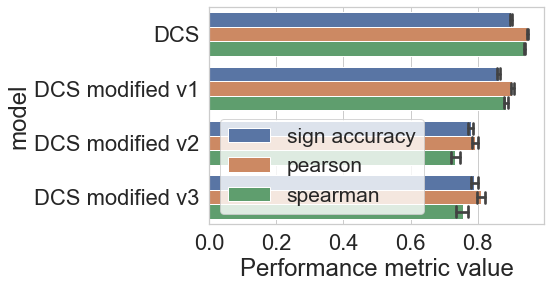

In [35]:
sns.set_theme(style="whitegrid",font_scale=2)
# plt.figure(figsize=(9,12), dpi= 80)
plt.figure()
ax = sns.barplot(x="value", y="model", data=res_recon_ht29,
            order=['DCS',
                   'DCS modified v1',
                   'DCS modified v2',
                   'DCS modified v3'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left',prop={'size': 21})
plt.gca().set(title='', 
              xlabel = 'Performance metric value',
              ylabel='model')
#plt.ylim(0,1.0)

In [36]:
models = ['DCS',
                   'DCS modified v1',
                   'DCS modified v2',
                   'DCS modified v3']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='pearson'].value.values
        x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-36-7f428d32650a>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='pearson'].value.values
<ipython-input-36-7f428d32650a>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='pearson'].value.values


In [37]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='spearman'].value.values
        x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-37-d8298965d0b4>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='spearman'].value.values
<ipython-input-37-d8298965d0b4>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='spearman'].value.values


In [38]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='sign accuracy'].value.values
        x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='sign accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'sign accuracy'

<ipython-input-38-9d6d1f9e8d53>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='sign accuracy'].value.values
<ipython-input-38-9d6d1f9e8d53>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='sign accuracy'].value.values


In [40]:
ht29_reconstruction = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
ht29_reconstruction = ht29_reconstruction[['metric','DCS',
                   'DCS modified v1',
                   'DCS modified v2',
                   'DCS modified v3']]
ht29_reconstruction.to_csv('../results/deepcellstate_results_10kgenes/ht29_all_autoencoders_comparison_allgenes_reconstruction_pvalues_table.csv')
ht29_reconstruction

,metric,DCS,DCS modified v1,DCS modified v2,DCS modified v3
DCS,pearson,1.0,0.000183,0.000183,0.000183
DCS modified v1,pearson,0.0,1.000000,0.000183,0.000183
DCS modified v2,pearson,0.0,0.000000,1.000000,0.025748
DCS modified v3,pearson,0.0,0.000000,0.000000,1.000000
DCS,spearman,1.0,0.000183,0.000183,0.000183
DCS modified v1,spearman,0.0,1.000000,0.000183,0.000183
DCS modified v2,spearman,0.0,0.000000,1.000000,0.104110
DCS modified v3,spearman,0.0,0.000000,0.000000,1.000000
DCS,sign accuracy,1.0,0.000183,0.000183,0.000183
DCS modified v1,sign accuracy,0.0,1.000000,0.000183,0.000183


# Combine the barplots from the two cell-lines into one figure with 2 panels

In [55]:
plt.rcParams["figure.figsize"] = (6, 3)

<ipython-input-95-772bba99b9fc>:65: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


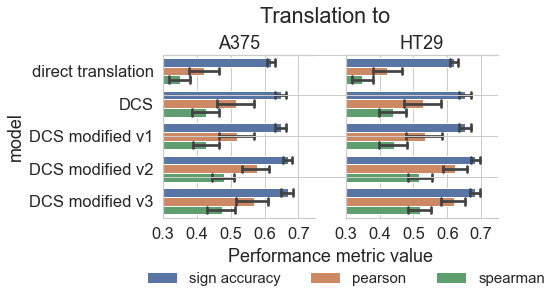

In [95]:
# plt.figure(figsize=(8,16), dpi= 80)
sns.set_theme(style="whitegrid",font_scale=1.5)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2)

ax = sns.barplot(ax=axes[0],x="value", y="model", data=res_to_a375,
            order=['direct translation',
                   'DCS',
                   'DCS modified v1',
                   'DCS modified v2',
                   'DCS modified v3'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
axes[0].legend_.remove()

ax = sns.barplot(ax=axes[1],x="value", y="model", data=res_to_ht29,
            order=['direct translation',
                   'DCS',
                   'DCS modified v1',
                   'DCS modified v2',
                   'DCS modified v3'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
axes[1].legend_.remove()

# Fix axes titles and ticks
axes[0].set_xlim([0.3, 0.75])  # Set x-limit for the first subplot
axes[0].set_xticks([0.3,0.4,0.5,0.6,0.7])  # Set x-ticks for the first subplot
axes[1].set_xlim([0.3, 0.75])  # Set x-limit for the second subplot
axes[1].set_xticks([0.3,0.4,0.5,0.6,0.7])  # Set x-ticks for the second subplot
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_yticks([])

legend_labels = ['sign accuracy','pearson','spearman']
# Get the handles and labels from any of the subplots
handles, labels = axes[0].get_legend_handles_labels()
ax.legend(handles=handles, 
          labels=legend_labels, 
          title='', 
          loc='lower center', 
          bbox_to_anchor=(0, -0.5), 
          ncol=len(legend_labels), 
          frameon=False,
          fontsize='small')

# set titles
axes[0].title.set_text('A375')
axes[1].title.set_text('HT29')
fig.suptitle('Translation to',y=1.1)

# # Add a common x-axis label
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xticks([])
plt.xlabel("Performance metric value", labelpad=30)

# Remove borders of subplots
for ax in axes:
    ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_visible(False)

plt.tight_layout()
# Adjust subplot spacing
# plt.subplots_adjust(wspace=1)

plt.savefig('../article_supplementary_info/supplementary_fig1b_translation.eps',
            papertype="a4",
            format='eps',
            bbox_inches='tight',dpi=600)

<ipython-input-96-0ce0ccb50fe6>:70: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


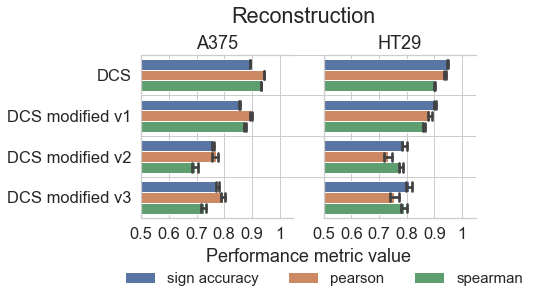

In [96]:
plt.rcParams["figure.figsize"] = (6, 3)
sns.set_theme(style="whitegrid",font_scale=1.5)
# plt.figure(figsize=(9,12), dpi= 80)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2,sharex=False)

ax = sns.barplot(ax=axes[0],x="value", y="model", data=res_recon_a375,
            order=['DCS',
                   'DCS modified v1',
                   'DCS modified v2',
                   'DCS modified v3'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
axes[0].legend_.remove()

ax = sns.barplot(ax=axes[1],x="value", y="model", data=res_recon_ht29,
            order=['DCS',
                   'DCS modified v1',
                   'DCS modified v2',
                   'DCS modified v3'],
            hue="metric",ci=95,capsize=0.2,orient='h')
axes[1].legend_.remove()

# Fix axes titles and ticks
# For subplot 1
axes[0].set_xlim([0.5, 1.05])  # Set x-limit for the first subplot
axes[0].set_xticks([0.5,0.6,0.7,0.8,0.9,1])  # Set x-ticks for the first subplot
axes[0].set_xticklabels([0.5,0.6,0.7,0.8,0.9,1])
axes[0].set_xlabel("")
axes[0].set_ylabel("")

# For the second subplot
axes[1].set_xlim([0.5, 1.05])  # Set x-limit for the second subplot
axes[1].set_xticks([0.5,0.6,0.7,0.8,0.9,1])  # Set x-ticks for the second subplot
axes[1].set_xticklabels([0.5,0.6,0.7,0.8,0.9,1])
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_yticks([])

legend_labels = ['sign accuracy','pearson','spearman']
# Get the handles and labels from any of the subplots
handles, labels = axes[0].get_legend_handles_labels()
ax.legend(handles=handles, 
          labels=legend_labels, 
          title='', 
          loc='lower center', 
          bbox_to_anchor=(0, -0.5), 
          ncol=len(legend_labels), 
          frameon=False,
          fontsize='small')


# set titles
axes[0].title.set_text('A375')
axes[1].title.set_text('HT29')
fig.suptitle('Reconstruction',y=1.1)

# # Add a common x-axis label
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xticks([])
plt.xlabel("Performance metric value", labelpad=30)

# Remove borders of subplots
for ax in axes:
    ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_visible(False)

plt.tight_layout()
# Adjust subplot spacing
# plt.subplots_adjust(wspace=1)
plt.savefig('../article_supplementary_info/supplementary_fig1b_reconstruction.eps',
            papertype="a4",
            format='eps',
            bbox_inches='tight',dpi=600)